# Examen Python data developer
# Deel 1
## Introductie
Voor dit examen is het belangrijk dat je volgende zaken zeker doet:
 - Maak een Vitual Environment aan & exporteer een `.yml` (of soortgelijke) file aan die je toevoegt aan je codebase.
 - Maak een github pagina aan met een bijhorende `.gitignore` en `readme.md`. Voeg een link naar de github repo toe aan je readme file.
 - Zorg dat je op het einde de tijd neemt om je code op te schonen zodat deze begrijpelijk is voor derden.
 - Wanneer je klaar bent, maak een `.zip` bestand van je volledige codebase aan en laad deze op in de leeromgeving.

In deze opgave bekijken we een gesimuleerde dataset over de geboortes in België van 2019. De data is te vinden in `.csv` bestanden die gelabeld zijn met de echte geboortedag van de personen in het bestand. Laat ons bijvoorbeeld even kijken naar de eerste 5 lijnen van het bestand `2019-1-1.csv`:

<table align="center">
  <tr>
    <th>gemeente</th>
    <th>naam</th>
    <th>geslacht</th>
    <th>verwachte datum</th>
  </tr>
  <tr>
    <td>Hooglede</td>
    <td>Elias</td>
    <td>Mannelijk</td>
    <td>01/14/2019</td>
  </tr>
  <tr>
    <td>Sint-Niklaas (Sint-Niklaas)</td>
    <td>Pauline</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Wijnegem</td>
    <td>Anita</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Grâce-Hollogne</td>
    <td>Jean-Paul</td>
    <td>Mannelijk</td>
    <td>01/13/2019</td>
  </tr>
  <tr>
    <td>Boussu</td>
    <td>François</td>
    <td>Mannelijk</td>
    <td>01/26/2019</td>
  </tr>
</table>


Hier hebben we de kolommen:
 - **gemeente**: De gemeente waar de persoon geboren is.
 - **naam**: De voornaam van de persoon.
 - **geslacht**: Het geslacht van de persoon (Mannelijk of Vrouwelijk).
 - **verwachte datum**: De verwachte geboortedatum van de persoon.

Dus hier hebben we dan bijvoorbeeld op de eerste lijn de mannelijke persoon Elias die geboren is in Hooglede waarvan men verwachtte dat hij zou geboren worden op `01/14/2019` (Amerikaans formaat) maar in feite geboren is op 1 januari 2019.

Doorheen deze opgave gaan we de data van dichterbij inspecteren! Je kan deze opgaves alternatief lezen in de bijgeleverde notebook `examen.ipynb` waar ook de (meeste) afbeeldingen & resultaten zichtbaar zijn.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from datetime import datetime
import sys
sys.path.append('../scripts')  # Adjust the path accordingly

# Definieer data locaties
input_path = os.path.join('..', 'data', 'input')
output_path = os.path.join('..', 'data', 'output')
# absolute_path = os.path.abspath(input_path)
# print(absolute_path)

## Utilities

In [2]:
def to_percentage(number):
    return str(np.round(number * 100, 2)) + "%"

def compute_num_unique(df, n_births):
    return len(np.unique(df['naam'].sample(n_births)))

## Stap 1: data inlezen

Maak een lus over alle bestanden in de map `data/geboortes`, lees elk `.csv` bestand in en voeg deze samen tot 1 grote DataFrame. Merk op dat de datum verwerkt zit in de filename, voeg deze toe aan de kleine DataFrames voor je de dataframes samenvoegt met een `pd.concat(dfs)`.

Voeg een extra kolom toe met een `"dag van het jaar"` getal, dus 1 januari 2019 is `1`, 2 januari 2019 is `2`, enzovoort.

**Opmerking**: Er is ook data voor 29 februari 2019, terwijl dit geen schrikkeljaar is! Plaats deze geboortes in een afzonderlijke DataFrame `df_wrong`. Zet in `df_wrong` een extra kolom met een referentie naar waarom deze data foutief is.

In [3]:
# Create an empty list to store DataFrames
dfs = []
df_wrong = pd.DataFrame()

# Loop through CSV files in the folder
for filename in os.listdir(input_path):
    if filename.endswith(".csv"):  # Check if it's a CSV file
        # Extract the date from the filename
        date_str = filename.split(".")[0]
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(input_path, filename))
        
        # Add a new 'date' column to the DataFrame with the extracted date
        df['dag geboorte'] = date_str
        
        # Check if it's February 29, 2019
        if date_str == "2019-2-29":
            # Add the DataFrame rows to df_wrong
            df['reden foutief'] = "Onbestaande geboortedag"
            df_wrong = pd.concat([df_wrong, df], ignore_index=True)
        else:
            # Append the DataFrame to the 'dfs' list
            dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

In [4]:
df_wrong

,gemeente,naam,geslacht,verwachte datum,dag geboorte,reden foutief
0,Kruisem,Patrick,Mannelijk,02/27/2019,2019-2-29,Onbestaande geboortedag
1,Montigny-le-Tilleul,Sarah,Vrouwelijk,03/11/2019,2019-2-29,Onbestaande geboortedag
2,Diepenbeek,Valentinus,Mannelijk,03/02/2019,2019-2-29,Onbestaande geboortedag
3,Sint-Jans-Molenbeek,El,Mannelijk,02/27/2019,2019-2-29,Onbestaande geboortedag
4,Overijse,Apolline,Vrouwelijk,03/03/2019,2019-2-29,Onbestaande geboortedag
...,...,...,...,...,...,...
68,Herentals,Leen,Vrouwelijk,03/10/2019,2019-2-29,Onbestaande geboortedag
69,’s Gravenbrakel,Caroline,Vrouwelijk,03/02/2019,2019-2-29,Onbestaande geboortedag
70,Ieper,Marleen,Vrouwelijk,03/12/2019,2019-2-29,Onbestaande geboortedag
71,Ciney,Alain,Mannelijk,02/28/2019,2019-2-29,Onbestaande geboortedag


In [5]:
combined_df

,gemeente,naam,geslacht,verwachte datum,dag geboorte
0,Hooglede,Elias,Mannelijk,01/14/2019,2019-1-1
1,Sint-Niklaas (Sint-Niklaas),Pauline,Vrouwelijk,01/05/2019,2019-1-1
2,Wijnegem,Anita,Vrouwelijk,01/05/2019,2019-1-1
3,Grâce-Hollogne,Jean-Paul,Mannelijk,01/13/2019,2019-1-1
4,Boussu,François,Mannelijk,01/26/2019,2019-1-1
...,...,...,...,...,...
116845,Lede,Lobke,Vrouwelijk,09/12/2019,2019-9-9
116846,Westerlo,Willem,Mannelijk,09/04/2019,2019-9-9
116847,Brugge,Diane,Vrouwelijk,09/20/2019,2019-9-9
116848,Lendelede,Marie-Rose,Vrouwelijk,10/28/2019,2019-9-9


### Omzetten naar datetimes & toevoegen "dag van het jaar"

Vooraleer we 'dag van het jaar' kunnen toevoegen, moeten we datums eerst omzetten naar datetimes. We checken meteen even de datatypes van ALLE kolommen.

In [6]:
combined_df.dtypes

gemeente           object
naam               object
geslacht           object
verwachte datum    object
dag geboorte       object
dtype: object

In [7]:
# Convert 'verwachte datum' to datetime
combined_df['verwachte datum'] = pd.to_datetime(combined_df['verwachte datum'], format='%m/%d/%Y')

# Convert 'dag geboorte' to datetime
combined_df['dag geboorte'] = pd.to_datetime(combined_df['dag geboorte'], format='%Y-%m-%d')

# Check the data types of the columns after conversion
print("Data types of columns in the combined DataFrame after conversion:")
print(combined_df.dtypes)

Data types of columns in the combined DataFrame after conversion:
gemeente                   object
naam                       object
geslacht                   object
verwachte datum    datetime64[ns]
dag geboorte       datetime64[ns]
dtype: object


In [8]:
combined_df

,gemeente,naam,geslacht,verwachte datum,dag geboorte
0,Hooglede,Elias,Mannelijk,2019-01-14,2019-01-01
1,Sint-Niklaas (Sint-Niklaas),Pauline,Vrouwelijk,2019-01-05,2019-01-01
2,Wijnegem,Anita,Vrouwelijk,2019-01-05,2019-01-01
3,Grâce-Hollogne,Jean-Paul,Mannelijk,2019-01-13,2019-01-01
4,Boussu,François,Mannelijk,2019-01-26,2019-01-01
...,...,...,...,...,...
116845,Lede,Lobke,Vrouwelijk,2019-09-12,2019-09-09
116846,Westerlo,Willem,Mannelijk,2019-09-04,2019-09-09
116847,Brugge,Diane,Vrouwelijk,2019-09-20,2019-09-09
116848,Lendelede,Marie-Rose,Vrouwelijk,2019-10-28,2019-09-09


In [9]:
# Add a new column 'day_of_year' containing the day of the year
combined_df['dag van het jaar'] = combined_df['dag geboorte'].dt.dayofyear

# Let's sort on 'dag van het jaar'
combined_df.sort_values(by='dag van het jaar', ascending=True, inplace=True)

combined_df

,gemeente,naam,geslacht,verwachte datum,dag geboorte,dag van het jaar
0,Hooglede,Elias,Mannelijk,2019-01-14,2019-01-01,1
364,Scherpenheuvel-Zichem,Rudolphe,Mannelijk,2019-01-11,2019-01-01,1
363,Courcelles,Sarah,Vrouwelijk,2019-01-02,2019-01-01,1
362,Lille,Maria,Vrouwelijk,2018-12-31,2019-01-01,1
361,Koksijde,Martine,Vrouwelijk,2018-12-29,2019-01-01,1
...,...,...,...,...,...,...
35927,Balen,Ronny,Mannelijk,2019-12-30,2019-12-31,365
35926,Mechelen,Sanae,Vrouwelijk,2020-01-05,2019-12-31,365
35925,Blankenberge,Steve,Mannelijk,2019-12-27,2019-12-31,365
35932,Kalmthout,Dirk,Mannelijk,2020-01-25,2019-12-31,365


## Stap 2: Dagelijks aantal geboortes bekijken
#### Vraag 1: Maak een plot van het aantal geboortes per dag van het jaar. 

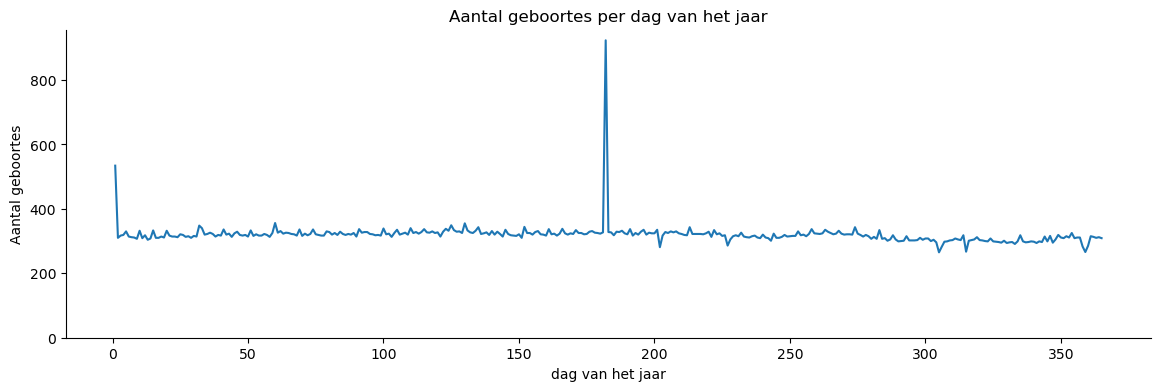

In [10]:
# Grouping by 'dag van het jaar' and counting the number of occurrences
births_per_day = combined_df.groupby('dag van het jaar').size()

# Plotting
plt.figure(figsize=(14, 4))  # Adjusted size
ax = births_per_day.plot(kind='line', linestyle='-')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Aantal geboortes per dag van het jaar')
plt.xlabel('dag van het jaar')
plt.ylabel('Aantal geboortes')

# No legend needed, because of title + clear axis names
# legend = plt.legend(["Aantal geboortes"], frameon=False)

# Setting y-axis lower limit to 0
ax.set_ylim(0)

plt.show()

#### Vraag 2: Outliers vinden & behandelen

We klassificeren een datum als een outlier als het aantal geboortes meer dan `50%` afwijkt van de gemiddelde waarde overheen de volledige dataset. Zoek alle outliers in de dataset.

In [11]:
# Grouping by 'dag van het jaar' and calculating the average number of births per day
births_per_day_mean = (combined_df
                  .groupby('dag van het jaar')
                  .size()
                  .mean()
                  .round(1))
print(f"Gemiddeld aantal geboortes per dag: {births_per_day_mean}")

# Calculate the thresholds for outliers (50% deviation)
lower_outlier_threshold = round(births_per_day_mean - 0.5 * births_per_day_mean, 1)
upper_outlier_threshold = round(births_per_day_mean + 0.5 * births_per_day_mean, 1)
print(f"Lower outlier threshold: {lower_outlier_threshold} ; Upper outlier threshold: {upper_outlier_threshold}")

# Calculate births per day
births_per_day = combined_df.groupby('dag geboorte').size()

# Find outliers based on the conditions
outliers = (births_per_day[(births_per_day < lower_outlier_threshold) | (births_per_day > upper_outlier_threshold)]
            .reset_index()
            .rename(columns={0: "aantal geboortes"}))
print(f"\nOutliers:\n {outliers}")

Gemiddeld aantal geboortes per dag: 320.1
Lower outlier threshold: 160.0 ; Upper outlier threshold: 480.2

Outliers:
   dag geboorte  aantal geboortes
0   2019-01-01               534
1   2019-07-01               923


Ik zal je vertellen; de outliers op 1 januari en 1 juli komen doordat alle geboortes waarvoor de datum niet correct genoteerd is, de datum 1 januari (voor de eerste helft van het jaar) en op 1 juli (voor de tweede helft van het jaar) geplaatst worden. Om dit op te lossen, halen we in de grote geboortes DataFrame (met 1 lijn per geboorte) deze twee datums er volledig uit. Dus we gaan **alle** geboortes van 1 januari en 1 juli verwijderen uit deze dataframe en toevoegen aan de `df_wrong` dataframe met als reden `2019-01-01` en `2019-07-01`.

In [12]:
# Filter rows where 'dag geboorte' matches one of the outliers
rows_to_move = combined_df[combined_df['dag geboorte'].isin(outliers['dag geboorte'])]

# Drop the column 'dag van het jaar' from rows_to_move
rows_to_move = rows_to_move.drop(columns='dag van het jaar')

# Add these rows to df_wrong with the reason for being wrong as 'dag geboorte'
rows_to_move['reden foutief'] = 'dag geboorte'
df_wrong_incl_1_jan_1_jul = pd.concat([df_wrong, rows_to_move], ignore_index=True)

# Remove these rows from combined_df
combined_df_excl_1_jan_1_jul = combined_df[~combined_df['dag geboorte'].isin(outliers['dag geboorte'])]

In [13]:
df_wrong_incl_1_jan_1_jul.sample(10)

,gemeente,naam,geslacht,verwachte datum,dag geboorte,reden foutief
323,Mechelen,Abderrahman,Mannelijk,2019-01-07 00:00:00,2019-01-01 00:00:00,dag geboorte
805,Farciennes,Julie,Vrouwelijk,2019-07-01 00:00:00,2019-07-01 00:00:00,dag geboorte
812,Sint-Gillis-Waas,Anna,Vrouwelijk,2019-07-12 00:00:00,2019-07-01 00:00:00,dag geboorte
1077,Oostende,Gino,Mannelijk,2019-07-06 00:00:00,2019-07-01 00:00:00,dag geboorte
1114,Lebbeke,Ingeborg,Vrouwelijk,2019-07-04 00:00:00,2019-07-01 00:00:00,dag geboorte
1106,Hemiksem,Michel,Mannelijk,2019-07-03 00:00:00,2019-07-01 00:00:00,dag geboorte
496,Mol,Lieve,Vrouwelijk,2019-01-03 00:00:00,2019-01-01 00:00:00,dag geboorte
257,Pont-à-Celles,Céline,Vrouwelijk,2019-01-16 00:00:00,2019-01-01 00:00:00,dag geboorte
377,Beringen,Leonia,Vrouwelijk,2019-01-05 00:00:00,2019-01-01 00:00:00,dag geboorte
203,Gent,Erna,Vrouwelijk,2019-01-05 00:00:00,2019-01-01 00:00:00,dag geboorte


In [14]:
# Quick sanity checks: A+B = C+D like it should be!
print(f"A. Original data without wrong: {len(combined_df)}")
print(f"B. Wrong without 1 jan & 1 jul: {len(df_wrong)}")

print(f"\nC. Original data without 29 feb, 1 jan and 1 jul: {len(combined_df_excl_1_jan_1_jul)}")
print(f"D. Wrong incl. 1 jan and 1 jul: {len(df_wrong_incl_1_jan_1_jul)}")

A. Original data without wrong: 116850
B. Wrong without 1 jan & 1 jul: 73

C. Original data without 29 feb, 1 jan and 1 jul: 115393
D. Wrong incl. 1 jan and 1 jul: 1530


Maak dezelfde plot nu opnieuw met het aantal geboortes per dag.

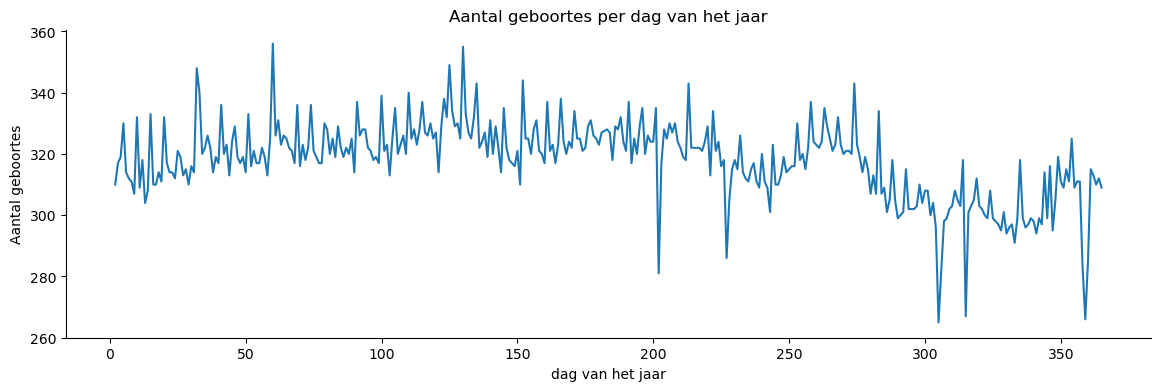

In [15]:
# Grouping by 'dag van het jaar' and counting the number of occurrences
births_per_day = combined_df_excl_1_jan_1_jul.groupby('dag van het jaar').size()

# Plotting
plt.figure(figsize=(14, 4))  # Adjusted size
ax = births_per_day.plot(kind='line', linestyle='-')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Aantal geboortes per dag van het jaar')
plt.xlabel('dag van het jaar')
plt.ylabel('Aantal geboortes')

# No legend needed, because of title + clear axis names
# legend = plt.legend(["Aantal geboortes"], frameon=False)

# Setting y-axis lower limit to 0
ax.set_ylim(260)

plt.show()

 We zien dat er nog steeds redelijk wat uitschieters zijn, kan je code schrijven om de 5 extreme uitschieters in de 2e helft van het jaar identificeren (in totaal 8 datums)?

In [16]:
# Grouping by 'dag van het jaar' and calculating the number of records
grouped_counts = combined_df_excl_1_jan_1_jul.groupby('dag van het jaar').size()

# Calculate the mean and standard deviation
mean = grouped_counts.mean()
std_dev = grouped_counts.std()

# Calculate z-scores
z_scores = (grouped_counts - mean) / std_dev

# Filter for outliers based on the criterion: if the deviation is greater than 2.5 z-scores.
# I don't consider outliers "aan de bovenkant" to be outliers (so only one-sided, or in other words: only the low values).
outliers = (grouped_counts[z_scores < -2.5]
            .reset_index()
            .rename(columns={0: 'aantal geboortes'}))

outliers

,dag van het jaar,aantal geboortes
0,202,281
1,227,286
2,305,265
3,306,282
4,315,267
5,358,283
6,359,266
7,360,285


### Bonusvraag: wekelijkse verbanden

We zien vele pieken en dalen in de evolutie van het aantal geboortes. We willen deze grafiek graag iets "gladder" maken. Kan je hiervoor eens een visualizatie maken van het **gemiddeld** aantal geboortes per week (dit voor elke week, dus maandag-maandag, dinsdag-dinsdag, woensdag-woensdag, ...).

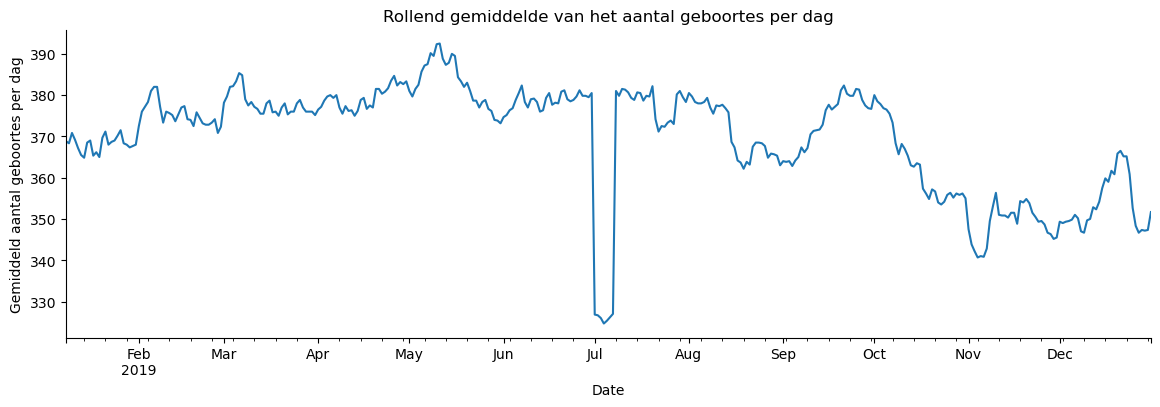

In [37]:
# Set 'dag geboorte' as the index without using inplace=True
combined_df_rolling = (combined_df_excl_1_jan_1_jul
                        .set_index('dag geboorte')
                        .resample('D')
                        .size()
                        .rolling(window=7, min_periods=1)
                        .sum())

# Omit the first 6 days -> rolling mean will be too low because less than 7 days are in it!
combined_df_rolling = combined_df_rolling.iloc[6:]

# ----------------------------------------------------------------------------
# DIT STUK WERKT NOG NIET ZOALS IK WIL, 
# Generate a list of dates from 1st July to 7th July 2019
dates_to_check = pd.date_range(start='2019-07-01', end='2019-07-07')

# Check if any of these dates are present in the index of combined_df_rolling
if combined_df_rolling.index.isin(dates_to_check).any():
    combined_df_rolling /= 6
else:
    combined_df_rolling /= 7
# -----------------------------------------------------------------------------

# Plot the rolling sum
plt.figure(figsize=(14, 4))
combined_df_rolling.plot()

# Remove spines on top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Label axes and title
plt.xlabel('Date')
plt.ylabel('Gemiddeld aantal geboortes per dag')
plt.title('Rollend gemiddelde van het aantal geboortes per dag')

plt.show()

## TO DO (maar geen tijd): 1 juli opvullen VOORDAT de rolling mean wordt berekend!

Dat ziet er al een stuk mooier uit!  We zien ook een aantal duidelijk dips & pieken verschijnen die we eerder niet zagen. We kunnen nu ook even kijken naar het gemiddeld aantal geboortes per dag van de week! Misschien worden er wel gewoon veel minder mensen geboren op zondag dan een andere dag?

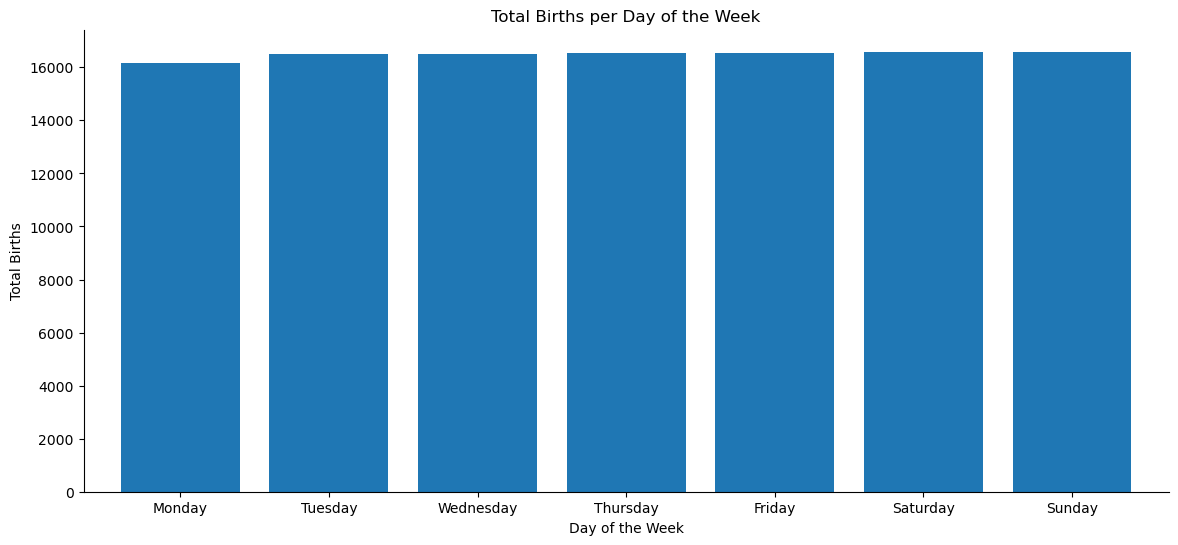

In [18]:
# Make a copy of the DataFrame to avoid the SettingWithCopyWarning
combined_df_excl_1_jan_1_jul_copy = combined_df_excl_1_jan_1_jul.copy()

# Extract day of the week and calculate total births for each day
combined_df_excl_1_jan_1_jul_copy['day_of_week'] = combined_df_excl_1_jan_1_jul_copy['dag geboorte'].dt.dayofweek
total_births_per_day = combined_df_excl_1_jan_1_jul_copy.groupby('day_of_week').size()

# Plot the total births per day of the week
plt.figure(figsize=(14, 6))

# Adjust the width of the bars
total_births_per_day.plot(kind='bar', width=0.8)

# Remove spines on top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add title and labels
plt.title('Total Births per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Births')

# Define tick labels for x-axis and rotate them horizontally
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0, ha='center')

plt.show()